<h2>Face Emotion Detection<h2>

# Step 1. Data Loading
#We have been provided with 213 images of 7 facial expressions in a single folder structure in below format
#[PersonName].[ExpressionName][Number of the respective expression][ImageID].tiff
#First separate the images based on the labels to respective folders.


In [51]:
#loading the Data from local and copying the files into 7 different folder structures.
IMG_DIR=".//Expression Data//"
import os
from shutil import copyfile,move
for filenames in os.listdir(IMG_DIR):
    if 'tiff' in filenames:
        if "HA" in filenames.split('.')[1]:
            copyfile(os.path.join(IMG_DIR,filenames),os.path.join(os.path.join(IMG_DIR,"extract//train//HA//"),filenames))
        elif "SA" in filenames.split('.')[1]:
            copyfile(os.path.join(IMG_DIR, filenames), os.path.join(os.path.join(IMG_DIR, "extract//train//SA//"), filenames))
        elif 'SU' in filenames.split('.')[1]:
            copyfile(os.path.join(IMG_DIR, filenames), os.path.join(os.path.join(IMG_DIR, "extract//train//SU//"), filenames))
        elif "AN" in filenames.split('.')[1]:
            copyfile(os.path.join(IMG_DIR, filenames), os.path.join(os.path.join(IMG_DIR, "extract//train//AN//"), filenames))
        elif "DI" in filenames.split('.')[1]:
            copyfile(os.path.join(IMG_DIR, filenames), os.path.join(os.path.join(IMG_DIR, "extract//train//DI//"), filenames))
        elif "FE" in filenames.split('.')[1]:
            copyfile(os.path.join(IMG_DIR, filenames), os.path.join(os.path.join(IMG_DIR, "extract//train//FE//"), filenames))
        elif "NE" in filenames.split('.')[1]:
            copyfile(os.path.join(IMG_DIR, filenames), os.path.join(os.path.join(IMG_DIR, "extract//train//NE//"), filenames))
        else:
            pass

#now when we have our folder structure ready, randomly move 20% (approx) of the images to our test folder
train_folder=".//Expression Data//extract//Augmentation//train//"
test_folder=".//Expression Data//extract//Augmentation//test//"
for folders in os.listdir(train_folder):
    count=round(len(os.listdir(os.path.join(train_folder, folders))) * 0.2)
    # print(count)
    for filenames in os.listdir(os.path.join(train_folder,folders)):
        if "HA" in folders and count>0:
            # move("C:\\Users\\1000267332\\PycharmProjects\\Assignment\\Expression Data\\extract\\train\\AN\\KA.AN1.39.tiff","C:\\Users\\1000267332\\PycharmProjects\\Assignment\\Expression Data\\extract\\test\\AN\\KA.AN1.39.tiff")
            move(os.path.join(os.path.join(train_folder, folders+'//'),filenames), os.path.join(os.path.join(test_folder, folders+'//'),filenames))
            count-=1
        elif "AN" in folders and count>0:
            move(os.path.join(os.path.join(train_folder, folders + '//'), filenames),
                 os.path.join(os.path.join(test_folder, folders + '//'), filenames))
            count -= 1
        elif "DI" in folders and count>0:
            move(os.path.join(os.path.join(train_folder, folders + '//'), filenames),
                 os.path.join(os.path.join(test_folder, folders + '//'), filenames))
            count -= 1
        elif "FE" in folders and count>0:
            move(os.path.join(os.path.join(train_folder, folders + '//'), filenames),
                 os.path.join(os.path.join(test_folder, folders + '//'), filenames))
            count -= 1
        elif "NE" in folders and count>0:
            move(os.path.join(os.path.join(train_folder, folders + '//'), filenames),
                 os.path.join(os.path.join(test_folder, folders + '//'), filenames))
            count -= 1
        elif "SA" in folders and count>0:
            move(os.path.join(os.path.join(train_folder, folders + '//'), filenames),
                 os.path.join(os.path.join(test_folder, folders + '//'), filenames))
            count -= 1
        elif "SU" in folders and count>0:
            move(os.path.join(os.path.join(train_folder, folders + '//'), filenames),
                 os.path.join(os.path.join(test_folder, folders + '//'), filenames))
            count -= 1

            

# <!-- step 2. Preprocessing and Label Generation -->


# Step 2. Preprocessing and Label Generation

#Since we have very less number of images for training, we will use keras augmentation process to generated more images
#Example- Zooming, shifting the height,rotation

#A separate utility class was created for this task, however attaching it here for display purpose

In [14]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
from shutil import copyfile
train_datagen=ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen=ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_folder=".//Expression Data//extract//Augmentation//train//"
test_folder=".//Expression Data//extract//Augmentation//test//"

#Data Augmentation for default training set
for folders in os.listdir(train_folder):
    print(f"Currently into {folders} folder for training data")
    for images in os.listdir(os.path.join(train_folder,folders)):
        img = image.load_img(os.path.join(os.path.join(train_folder,folders+'//'),images), target_size=(224, 224,3))
        copyfile(os.path.join(os.path.join(os.path.join(train_folder, folders + '//'), images)), os.path.join(
            os.path.join('..\\Expression Data\\extract\\Augmentation\\train\\',folders + '\\'), images))
        x=image.img_to_array(img)
        x=x.reshape((1,)+x.shape) # API requires input to be of rank 4, that is (1,224,224,3)
        i = 0 #default batch size is 32, but we want to restrict the task at 20
        for batch in train_datagen.flow(x, save_to_dir=os.path.join('C..\\Expression Data\\extract\\Augmentation\\train\\',folders+'\\'), save_prefix=f'emotion_{folders}', save_format='tiff'):
            i += 1
            if i > 20:
                break

#Data Augmentation for test set
for folders in os.listdir(test_folder):
    print(f"Currently into {folders} folder for test data")
    for images in os.listdir(os.path.join(test_folder,folders)):
        img = image.load_img(os.path.join(os.path.join(test_folder,folders+'//'),images), target_size=(224, 224,3))
        copyfile(os.path.join(os.path.join(os.path.join(test_folder,folders+'//'),images)),os.path.join(os.path.join('..\\Expression Data\\extract\\Augmentation\\test\\',folders+'\\'),images))
        x=image.img_to_array(img)
        x=x.reshape((1,)+x.shape)  # API requires input to be of rank 4, that is (1,224,224,3)
        i = 0 #default batch size is 32, but we want to restrict the task at 20
        for batch in train_datagen.flow(x, save_to_dir=os.path.join('..\\Expression Data\\extract\\Augmentation\\test\\',folders+'\\'), save_prefix=f'emotion_{folders}', save_format='tiff'):
            i += 1
            if i > 20:
                break

print("End of the Augmentation Task.")


End of the Augmentation Task.


# Step 3. Train/Test Split

#We have already splitted our original data into 80:20 ratio. Then we have executed Augmentation Task

#We used python to split the original data into test and train data set. No libraries used

# Import Libraries


In [2]:
# import libs
from keras.layers import  Input, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import keras
print("Libs imported")

#We are using resNet50, expected input size is [224,224]
IMAGE_SIZE=[224, 224]

Libs imported


In [3]:

import keras
print(keras.__version__)
# import tensorflow as tf
# print(tf.__version__)

2.4.3


# Using a pretrained ResNet50 CNN model which is already trained on 1000 object categories

In [6]:
resnet = ResNet50(include_top=False,  pooling='none', input_shape=IMAGE_SIZE +[3],  weights='imagenet')
cfg = resnet.get_config()
cfg['layers'][0]['config']['batch_input_shape'] = (None, 224, 224, 1)
resnet_model = Model.from_config(cfg) 


for i, layer in enumerate(resnet_model.layers):
    if i == 1:
#         print('up')
        new_weights = resnet.layers[i].get_weights()[0].sum(axis=2, keepdims=True)
        resnet_model.set_weights([new_weights])
        layer.trainable = False
    else: 
        break
        
       


In [7]:
#it is a 50 layer model and we will be adding an additional dense layer of size 7 
#marking layers to non-trainable. We are trusting the existing weights to work so no need to retrain those.
for layers in resnet.layers:
    layers.trainable= False

In [9]:
#Taking the output of the last convolution block in ResNet50

In [10]:
X=Flatten()(resnet.output)
#useful for getting number of output classes
folders=glob('../input/newfile/Augmentation/train/*')

In [11]:
# Adding a fully connected layer having 7 neurons
# prediction=Dense(len(folders), activation='softmax',name="Expression")(X) 
prediction=Dense(len(folders), activation='softmax')(X) 

In [12]:
# Model to be trained
model=Model(inputs=resnet.input, outputs=prediction)

In [41]:
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [13]:
#We have successfully added a new layer to our model. Layer name Expression

In [25]:
#set what cost and optimization method to use for our model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
#using the image data generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [17]:
training_set=train_datagen.flow_from_directory(train_folder, target_size=(224,224), batch_size=5,  class_mode='categorical',shuffle=False)
test_set=test_datagen.flow_from_directory(test_folder, target_size=(224,224), batch_size=5, class_mode='categorical',shuffle=False)

Found 4518 images belonging to 7 classes.
Found 929 images belonging to 7 classes.


# Found 4518 images belonging to 7 classes.
# Found 929 images belonging to 7 classes.

# step 4 fitting and training the Model (used kaggle kernel for execution) (NVidia K80 GPUs)
<!-- r=model.fit_generator(training_set, validation_data=test_set, epochs=400, steps_per_epoch=141, validation_steps=len(test_set)) -->

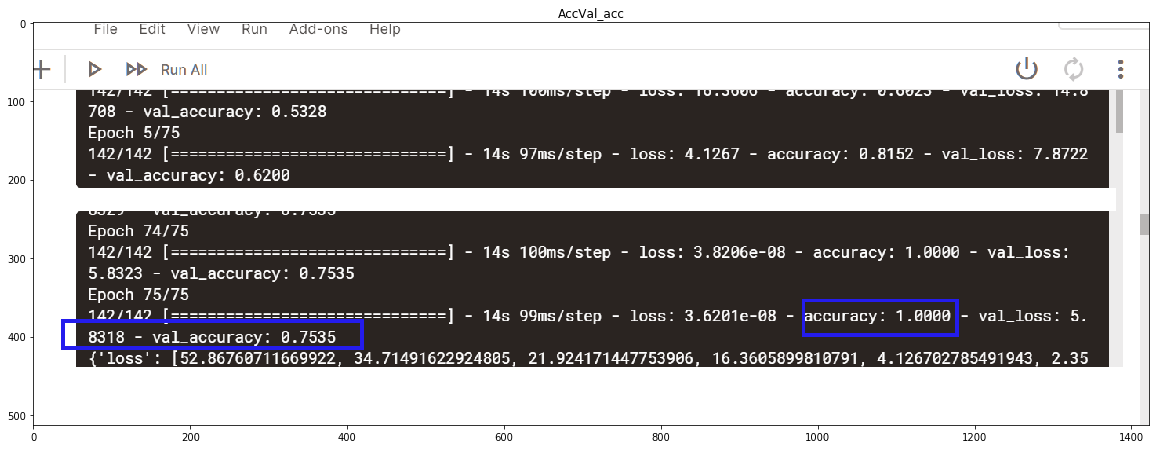

In [19]:
import cv2
img = cv2.imread('kaggle-training.png')
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.title('AccVal_acc')
plt.show()

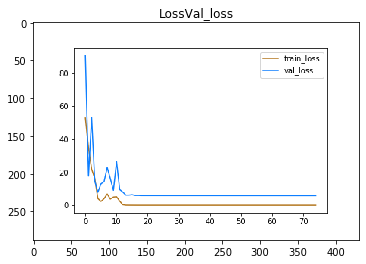

<Figure size 1440x720 with 0 Axes>

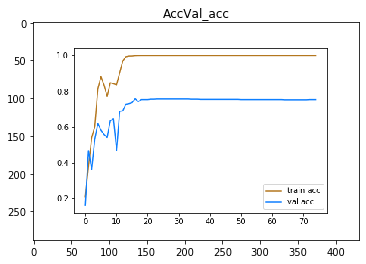

<Figure size 1440x720 with 0 Axes>

In [20]:
# print(r.history)

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#plot the loss
# plt.plot(r.history['loss'], label='train_loss')
# plt.plot(r.history['val_loss'] , label='val_loss')
# plt.legend()
# plt.show()
# plt.savefig('LossVal_loss')
img = cv2.imread('LossVal_loss.png')
plt.imshow(img)
plt.title('LossVal_loss')
plt.figure(figsize=(20,10))
plt.show()


#plot the accuracy
# plt.plot(r.history['accuracy'], label='train acc')
# plt.plot(r.history['val_accuracy'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')
img = cv2.imread('AccVal_acc.png')
plt.imshow(img)
plt.title('AccVal_acc')
plt.figure(figsize=(20,10))
plt.show()



# Step 5 Model Evaluation

# the requirement is to print the classification report using Sklearn API, so we are re-predicting out test data set to get the y_true  and y_pred classes

##Keras doesnt output the y_true and y_pred classes without shuffling hence this extract step is implemented

In [33]:
#first we are loading the saved model
# Keras  supports saving a single HDF5 file containing the model's architecture, weights values, and compile() information
#model.save('model_resnet50.h5')

In [21]:
from keras.models import load_model
from keras.preprocessing import  image
from keras.models import model_from_json

In [22]:
model1=load_model("face_model_resnet50(complete-model).h5")
# #loading the model
# json_file=open('face_emotions-model.json','r')
# model_json=json_file.read()
# json_file.close()

# loaded_model=model_from_json(model_json)

# #load weights into model
# loaded_model.load_weights('face_emotions_weights.h5')
print('Loaded model from disk')

Loaded model from disk


In [29]:
#This is an additional utility function to label the classes between 0 to 6 , required to generate y_true
import os

def folderEncoder(folderName):
    if folderName=='AN':
        return 0
    elif folderName=="DI":
        return 1
    elif folderName=='FE':
        return 2
    elif folderName=="HA":
        return 3
    elif folderName=='NE':
        return 4
    elif folderName=="SA":
        return 5
    elif folderName=='SU':
        return 6
    else:
        return None

result=[]
for folder1 in os.listdir(test_folder):
    y_true=folderEncoder(folder1)
    for filename in os.listdir(os.path.join(test_folder,folder1)):
#         print(filename)
        img = image.load_img(os.path.join(os.path.join(test_folder,folder1),filename), target_size=(224, 224))
        x = image.img_to_array(img)
#         x = x / 255
        x = np.expand_dims(x, axis=0)
        img_data = preprocess_input(x)
        y_pred=model1.predict(img_data)
#         y_pred=loaded_model.predict(img_data)
        y_pred=np.argmax(y_pred, axis=1)
        result.append([y_true,y_pred[0]])           
        


In [30]:

y_pred=y_true=[] #empty list for placeholder

y_true=[y[0] for y in result] # separating true classes
y_pred=[y[1] for y in result] # separating predicted classes
print(y_true,y_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [31]:
# print(model.summary())

importing SKLEARN and printing the classification report

In [32]:
from sklearn.metrics.classification import classification_report
target_classes = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise'] # creating variable to hold target classes


In [53]:
print(classification_report(y_true, y_pred, target_names=target_classes))

              precision    recall  f1-score   support

       Angry       0.69      0.81      0.75       132
     Disgust       0.81      0.66      0.73       131
        Fear       0.73      0.69      0.71       142
       Happy       0.89      0.84      0.86       132
     Neutral       0.75      0.75      0.75       131
         Sad       0.61      0.67      0.64       129
    Surprise       0.84      0.86      0.85       132

    accuracy                           0.75       929
   macro avg       0.76      0.75      0.75       929
weighted avg       0.76      0.75      0.75       929



In [71]:
#for final verification
img=image.load_img('emotion_SU_0_1349.tiff', target_size=(224,224))
x=image.img_to_array(img)
x = np.expand_dims(x, axis=0) # just increasing the rank 
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


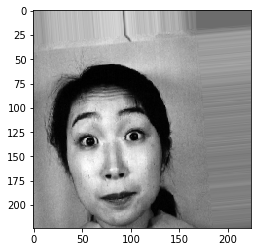

[6]


In [72]:
a=np.argmax(model1.predict(x), axis=1)
plt.imshow(img)
plt.show()

print(a)

# "Predicted as SAD as per the label -emotion_SU_0_1349")